In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
data1 = pd.read_csv("Data/DiscretTrous/DiscreteFlipTrous1.txt", sep=";")
data2 = pd.read_csv("Data/DiscretTrous/DiscreteFlipTrous2.txt", sep=";")

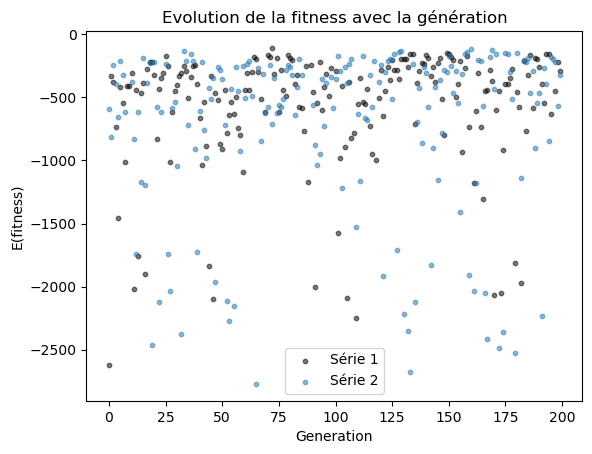

In [12]:
Values = [(0, 0, -3000, "k")]
mean = Values[0][0]
stdev = Values[0][1]
treshold = Values[0][2]

dataf1  = data1[((data1["E(fitness)"] >= treshold) & (data1["mean"] == mean) & (data1["stdev"] == stdev))]
plt.scatter(dataf1["Generation"], dataf1["E(fitness)"], c="k", alpha=0.5, s=10, label="Série 1")

dataf2  = data2[((data2["E(fitness)"] >= treshold) & (data2["mean"] == mean) & (data2["stdev"] == stdev))]
plt.scatter(dataf2["Generation"], dataf2["E(fitness)"], c="tab:blue", alpha=0.5, s=10, label="Série 2")



plt.xlabel("Generation")
plt.ylabel("E(fitness)")
plt.title("Evolution de la fitness avec la génération")
plt.legend()
plt.show()


In [13]:
def Visualiser_data(mean, stdev, acceptation, Name, data):
    A = np.array([])
    B = [str(mean), str(stdev), str(acceptation)]

    df = data[((data["mean"] == mean) & (data["stdev"] == stdev) & (data["acceptation"] == acceptation))]

    mask = (df["Generation"] == 0)

    A = np.array([df[mask]["E(fitness)"], df[mask]["fitness1"], df[mask]["Genes(Scores(0,1),:)"]])
    B.append(str(A[0][0]))
    B.append(str(A[1][0]))
    B.append(A[2,0][2:-2].replace(",",""))


    mask = (df["fitness1"] == df["fitness1"].max())

    A = np.array([df[mask]["E(fitness)"], df[mask]["fitness1"], df[mask]["Genes(Scores(0,1),:)"]])
    B.append(str(A[0][0]))
    B.append(str(A[1][0]))
    B.append(A[2,0][2:-2].replace(",",""))

    mask = (df["Generation"] == df["Generation"].max())

    A = np.array([df[mask]["E(fitness)"], df[mask]["fitness1"], df[mask]["Genes(Scores(0,1),:)"]])
    B.append(str(A[0][0]))
    B.append(str(A[1][0]))
    B.append(A[2,0][2:-2].replace(",",""))

    with open(Name, "w") as file:
        # Write each string to the file
        for string in B:
            file.write(string + "\n")

In [43]:
#stdev = 10 -> mean = -10, 0, 10
#stdev = 8 -> -5,0, 5

mean = 0
stdev = 0
acceptation = 0.9
Name = "test.txt"
Visualiser_data(mean, stdev, acceptation, Name, data1)